In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000

Dataset URL: https://www.kaggle.com/datasets/kmader/skin-cancer-mnist-ham10000
License(s): CC-BY-NC-SA-4.0
skin-cancer-mnist-ham10000.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/skin-cancer-mnist-ham10000.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
tabular_data = pd.read_csv('/content/HAM10000_metadata.csv')
tabular_data.head(10)

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
5,HAM_0001466,ISIC_0027850,bkl,histo,75.0,male,ear
6,HAM_0002761,ISIC_0029176,bkl,histo,60.0,male,face
7,HAM_0002761,ISIC_0029068,bkl,histo,60.0,male,face
8,HAM_0005132,ISIC_0025837,bkl,histo,70.0,female,back
9,HAM_0005132,ISIC_0025209,bkl,histo,70.0,female,back


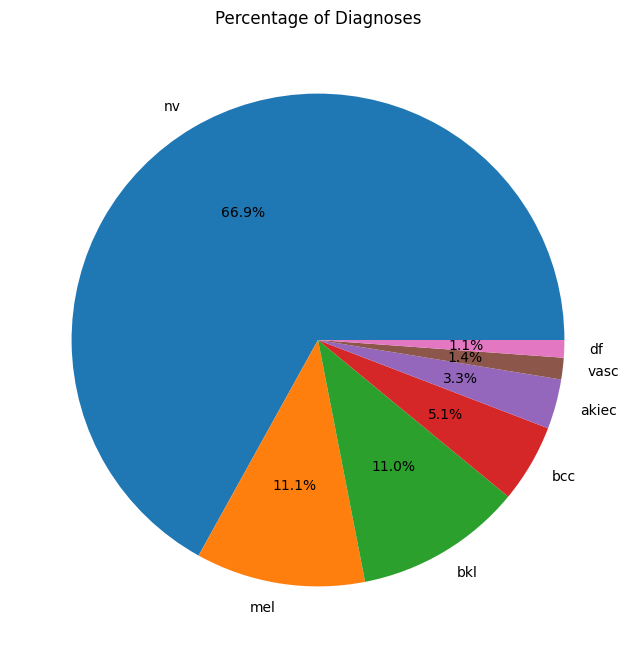

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each diagnosis
dx_counts = tabular_data['dx'].value_counts()



# Pie chart
dx_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Percentage of Diagnoses')
plt.ylabel('')  # Hide y-axis label for better appearance
plt.show()


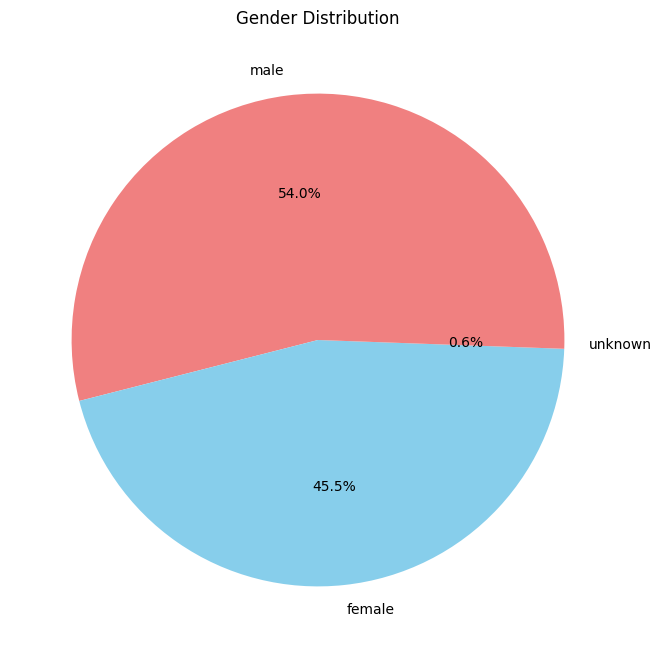

In [ ]:
# Count occurrences of each sex
sex_counts = tabular_data['sex'].value_counts()

# Pie chart
sex_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'skyblue'], figsize=(8, 8))
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()


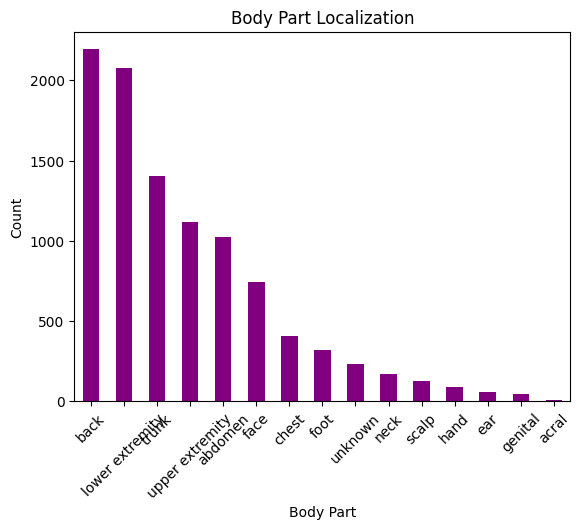

In [ ]:
# Count occurrences of each localization
localization_counts = tabular_data['localization'].value_counts()

# Bar chart
localization_counts.plot(kind='bar', color='purple')
plt.title('Body Part Localization')
plt.xlabel('Body Part')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


<ipython-input-70-3dabcc51b61f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='dx', y='age', data=tabular_data, palette='pastel')


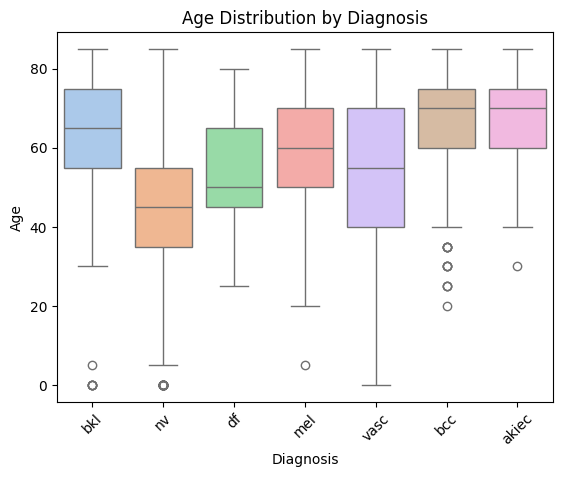

In [ ]:
sns.boxplot(x='dx', y='age', data=tabular_data, palette='pastel')
plt.title('Age Distribution by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [17]:
data = pd.read_csv('/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_RGB.csv')
data.head(5)

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


In [18]:
# Separate features (pixels) and labels
X = data.drop(columns=['label']).values
y = data['label'].values

In [19]:
from imblearn.over_sampling import RandomOverSampler

# Oversampling to Overcome Class Imbalance
oversample = RandomOverSampler()
X, y = oversample.fit_resample(X, y)
X = np.array(X).reshape(-1, 28, 28, 3)
print('Shape of X after oversampling:', X.shape)

Shape of X after oversampling: (46935, 28, 28, 3)


In [20]:
# Standardizing Data
#X = (X - np.mean(X)) / np.std(X)
X = X / 255.0

In [21]:
# Splitting Data into Training and Testing Sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(f'Training set size: {X_train.shape}, Testing set size: {X_test.shape}')

Training set size: (37548, 28, 28, 3), Testing set size: (9387, 28, 28, 3)


In [22]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.models import Sequential
# Building the CNN Model
model = Sequential([
    Input(shape=(28, 28, 3)),           # Input layer defining the shape
    Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2), padding='same'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(7, activation='softmax')
])

In [23]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 26, 26, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 13, 13, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 7)                   │             231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 182,663 (713.53 KB)

 Trainable params: 182,663 (713.53 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='best_model.keras',  # changed to `.keras` extension
    monitor='val_accuracy',       # monitoring validation accuracy
    mode='max',
    save_best_only=True,
    verbose=1
)

In [25]:
# Compiling the Model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [26]:
# Training the Model
history = model.fit(
    X_train, Y_train,
    validation_split=0.2,
    batch_size=64,
    epochs=50,
    callbacks=[callback]
)


Epoch 1/50
470/470 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3001 - loss: 1.6953
Epoch 1: val_accuracy improved from -inf to 0.52557, saving model to best_model.keras
470/470 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.3003 - loss: 1.6948 - val_accuracy: 0.5256 - val_loss: 1.1982
Epoch 2/50
460/470 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5828 - loss: 1.0648
Epoch 2: val_accuracy improved from 0.52557 to 0.72503, saving model to best_model.keras
470/470 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5838 - loss: 1.0626 - val_accuracy: 0.7250 - val_loss: 0.7364
Epoch 3/50
460/470 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7208 - loss: 0.7343
Epoch 3: val_accuracy improved from 0.72503 to 0.78136, saving model to best_model.keras
470/470 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7212 - loss: 0.7332 - val_accuracy: 0.7814 - val_loss: 0.5837
Epoch 4/50
459/470 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8044 - loss: 0.5282
Epoch 4: val_accuracy improved from 0.78

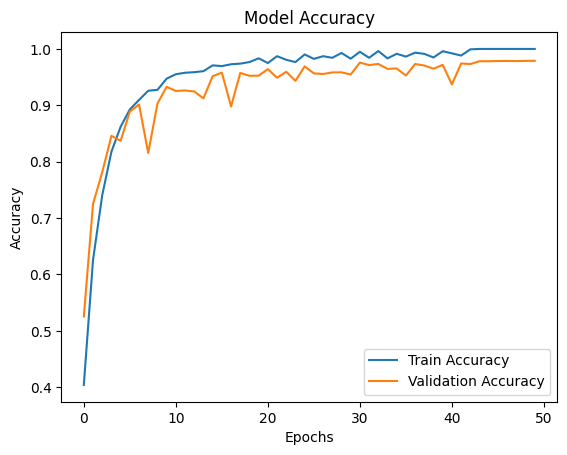

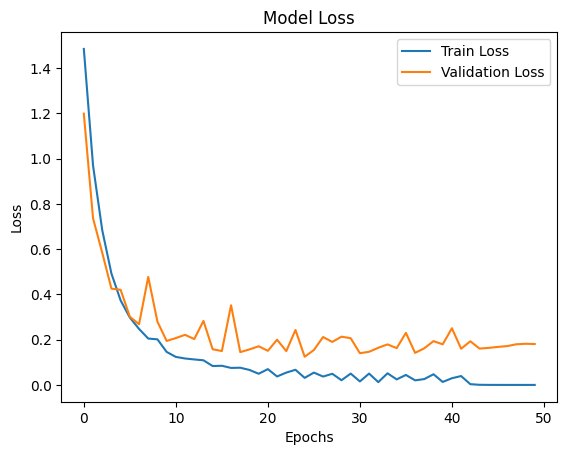

In [27]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


In [28]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=1)

# Print test results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


294/294 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9777 - loss: 0.1675
Test Loss: 0.1604
Test Accuracy: 97.90%


In [29]:
classes = {4: ('nv', ' melanocytic nevi'),
           6: ('mel', 'melanoma'),
           2 :('bkl', 'benign keratosis-like lesions'), 
           1:('bcc' , ' basal cell carcinoma'),
           5: ('vasc', ' pyogenic granulomas and hemorrhage'),
           0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),
           3: ('df', 'dermatofibroma')}
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import cv2
from PIL import Image

def load_trained_model(model_path='/kaggle/working/best_model.keras'):
    model = load_model(model_path)
    print("Model loaded successfully.")
    return model

def predict_image(img_path, model):
    img = Image.open(img_path)
    
    img = img.resize((28, 28))
    img_array = np.array(img) / 255.0
    
    if img_array.shape[-1] != 3:
        img_array = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
    
    img_array = np.expand_dims(img_array, axis=0)
    
    prediction = model.predict(img_array)
    print(prediction)
    predicted_class = np.argmax(prediction, axis=-1)
    
    return predicted_class[0], prediction[0]  #predicted class and the probability distribution

model = load_trained_model('/kaggle/working/best_model.keras')  # Load the trained model
import os

# Example Image directory
Pah = '/kaggle/input/lasttt'

# Get all image files in the directory
image_extensions = ['.jpg', '.jpeg', '.jfif', '.webp'] 
image_files = [f for f in os.listdir(Pah) if any(f.lower().endswith(ext) for ext in image_extensions)]

for img_file in image_files:
    img_path = os.path.join(Pah, img_file)
    
    predicted_class, prediction_probs = predict_image(img_path, model)
    print(f"Image: {img_file}")
    print(f"Predicted Class: {classes[predicted_class]}")
    #print(f"Prediction Probabilities: {prediction_probs}")
    #print('---' * 10)  # Separator for clarity



Model loaded successfully.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
[[5.5482523e-18 9.9997962e-01 6.7161312e-07 1.1311149e-19 1.9693505e-05
  1.0714976e-28 1.6281338e-20]]
Image: akiec.jpg
Predicted Class: ('bcc', ' basal cell carcinoma')
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[1.3714090e-10 9.9842781e-01 1.6155385e-10 2.8462388e-10 1.5721634e-03
  2.0295819e-24 7.7296919e-11]]
Image: bcc (1).jpg
Predicted Class: ('bcc', ' basal cell carcinoma')
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[[1.1453644e-25 9.8702387e-17 1.7044199e-08 0.0000000e+00 8.0970192e-01
  1.8216880e-44 1.9029811e-01]]
Image: melanoma2.jpg
Predicted Class: ('nv', ' melanocytic nevi')
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[[4.2038954e-45 8.5109738e-24 1.4980602e-29 9.7015476e-37 9.9999201e-01
  9.6689594e-44 7.9822885e-06]]
Image: vasc 3.jfif
Predicted Class: ('nv', ' melanocytic nevi')
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[4.0207993e-07 2.6305565e-06 8.9934927e-01 4.1176155e-12 1.0064773e-01
  1.1187029e-12 5.5744906e-0

In [30]:
import joblib 
model = load_trained_model('/kaggle/working/best_model.keras')  # Load your trained Keras model
joblib.dump(model, '/kaggle/working/best_model.pkl') #.pkl file

Model loaded successfully.


['/kaggle/working/best_model.pkl']

In [31]:
import pickle
from tensorflow.keras.models import load_model

# Function to save the trained model using Pickle
def save_model_with_pickle(model, model_path='best_model.pkl'):
    # Save the Keras model using pickle
    with open(model_path, 'wb') as f:
        pickle.dump(model, f)
    print(f"Model saved to {model_path}")
    
# Example usage:
model = load_model('/kaggle/working/best_model.keras')  # Load your trained Keras model
save_model_with_pickle(model, '/kaggle/working/model.pkl')  # Save the model using Pickle

Model saved to /kaggle/working/model.pkl
